# Homework Assignment \#3

### Problem 1.

In [3]:
import numpy as np
from scipy.stats import bernoulli, binom, poisson, norm, expon
import seaborn as sns

In [4]:
D = [[1], [0], [0], [0], [0], [1], [0], [1], [0], [0],
     [1], [1], [0], [0], [0], [0], [1], [0], [0], [0]]
mean_d = np.mean(D)
var_d = np.var(D)
print(mean_d)
print(var_d)

0.3
0.20999999999999996


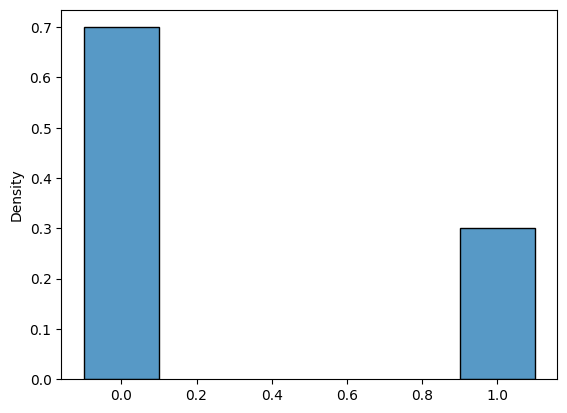

In [31]:
X = bernoulli(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

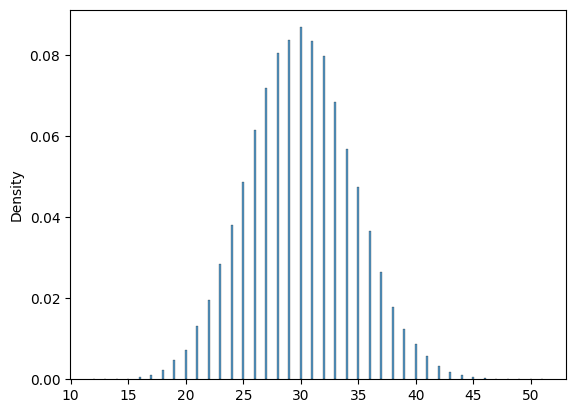

In [6]:
N = 100  # an additional assumption on the binomial trial
X = binom(N, mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

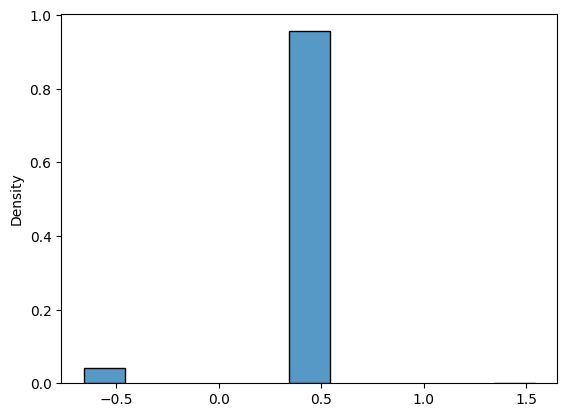

In [7]:
X = norm(mean_d, var_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

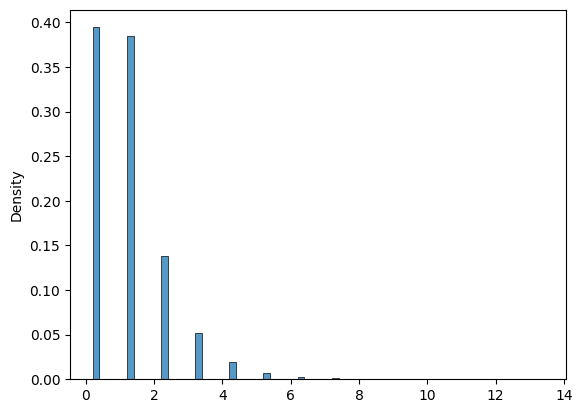

In [8]:
X = expon(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

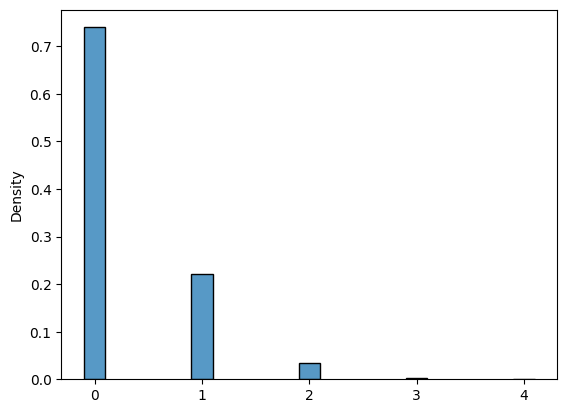

In [9]:
X = poisson(mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

### Problem 5.

In [2]:
# source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

def kde1D(x, bandwidth, kernel='tophat', bins=1000, hisbins=15, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(np.min(x)-np.std(x),np.max(x)+np.std(x), bins)[:, np.newaxis]
   # true_dens = (0.09 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
   # true_dens = (norm(np.mean(x), np.std(x)).pdf(xx[:, 0]))
    
    fig, ax = plt.subplots()
    #ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    hist = plt.hist(x, bins=hisbins, density=True, alpha=0.2, histtype='stepfilled', color='black', label='input distribution')
    
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(x)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.legend(loc='upper left')
    ax.text(0.06, 16, "N={0} points".format(N))

    return xx, z

0.013963752460080692
0.00875176676337728


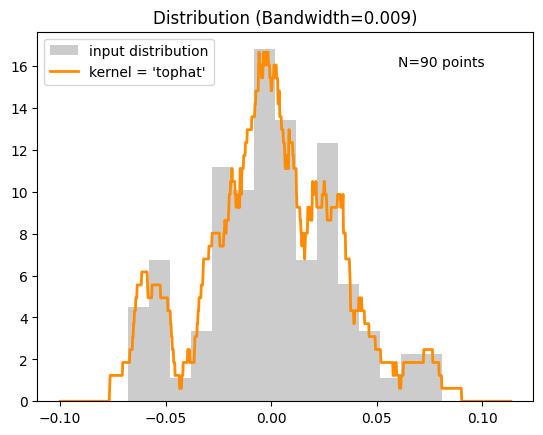

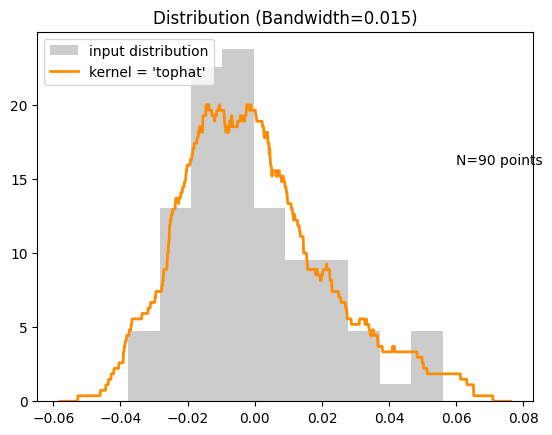

In [3]:
# (a)
data = pd.read_csv('./hw3_data.csv')

N = 90
amygdaladata = data.loc[:, 'amygdala']
accdata = data.loc[:, 'acc']
orientationdata = data.loc[:, 'orientation']

amygdala = data['amygdala'].values[:, np.newaxis]
acc = accdata.values[:, np.newaxis]
orientation = orientationdata.values[:, np.newaxis]

bandwidth_a = 0.009

best_bandwidth = (4 / 3 * amygdala.std() ** 5 / amygdala.size) ** 0.2
Pamy, amyden = kde1D(amygdala, bandwidth_a)
plt.title(f'Distribution (Bandwidth={bandwidth_a})')

# (b)
bandwidth_b = 0.015
Pacc, accden = kde1D(acc, bandwidth_b, hisbins=10)
plt.title(f'Distribution (Bandwidth={bandwidth_b})')
best_bandwidth2 = (4 / 3 * acc.std() ** 5 / acc.size) ** 0.2
print(best_bandwidth)
print(best_bandwidth2)

In [4]:
# from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='tophat', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]
    
    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)
    zznorm = zz/np.sum(zz)

    plt.pcolormesh(xx, yy, zznorm, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    cset = plt.contour(xx, yy, zznorm, colors='k', linewidths=0.5)
    plt.clabel(cset, inline=1, fontsize=10)

    
    return xx, yy, zz, zznorm

Text(0.5, 1.0, 'Joint Distribution (Bandwidth=0.03)')

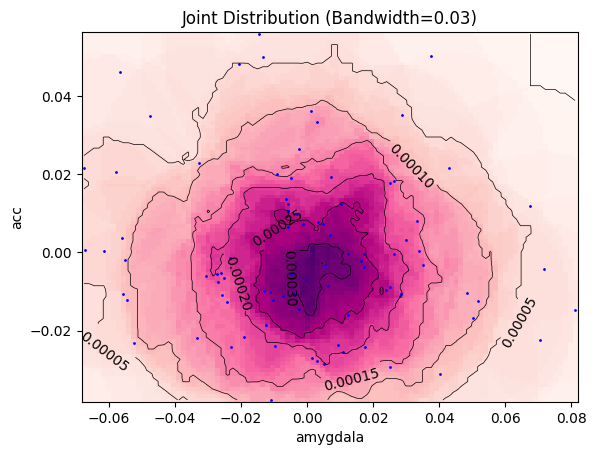

In [5]:
# (c)
bandwidth_c = 0.03

x = amygdaladata+accdata
y = amygdaladata-accdata

xx, yy, zz, zznorm = kde2D(amygdaladata, accdata, bandwidth_c, kernel='tophat', xbins=100j, ybins=100j)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title(f'Joint Distribution (Bandwidth={bandwidth_c})')

In [6]:
#(d)
from sklearn.metrics import mean_squared_error
N = 90
Px, z = kde1D(amygdala, bandwidth_a, bins=100)
plt.close()
Py, z2 = kde1D(acc, bandwidth_b, bins=100)
plt.close()

z = z.reshape(100,1)
z2 = z2.reshape(1,100)

z /= np.sum(z)
z2 /= np.sum(z2)

#P(x) * P(Y)
PxPy = np.matmul(z,z2)
#P(X,Y)
Pxy = zznorm
print(f'P(X)*P(Y) = {PxPy}')
print(f'P(X,Y) = {Pxy}')

# Independent or dependent
mse = mean_squared_error(PxPy, Pxy)
print(f'MSE = {mse}')

P(X)*P(Y) = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
P(X,Y) = [[1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 [1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 [1.90431454e-05 1.90431454e-05 1.90431454e-05 ... 1.26954303e-05
  1.26954303e-05 1.26954303e-05]
 ...
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.26954303e-05 1.26954303e-05 1.26954303e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
MSE = 1.176290232297465e-08


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [      -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf 5.13255295 5.13924487 5.01368045 5.45906834
 5.34456548 5.37352272 5.26829004 5.28222422 5.3892032  5.74771847
 5.6571502  5.78935332 5.78014316 5.69814466 5.83837581 5.76124291
 5.6863325  5.61352007 5.54269132 5.56299844 5.49582951 5.43035222
 5.43941209 5.37707472 5.31619701 5.25671218 5.1985579  5.25923329
 5.20356919 5.14907188 5.09569345 5.27601905 5.22474598 5.23200093
 5.18267344 5.13426439 5.08674022 5.04006916 4.9942211  5.05696683
 5.01268069 5.14423001 5.10140286 5.13472859 5.09326736 5.05245694
 5.01227721 4.97270896 4.93373387 4.89533442 5.00428768 4.96698995
 4.98775612 5.01466924 4.97891044 4.94363678 4.90883528 4.87449345
 4.84059932 4.80714135 4.

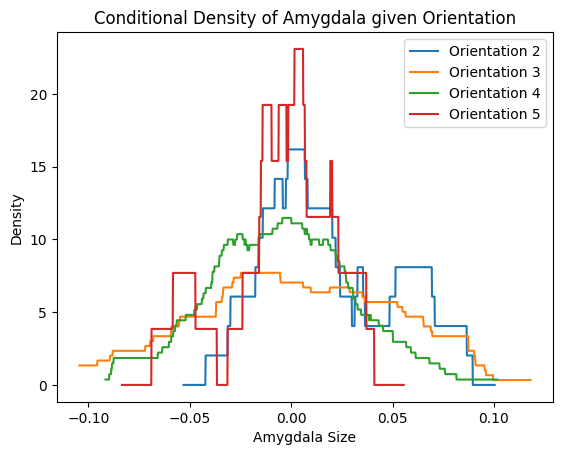

The most likely Orientation for Amygdala = 0.035 is 2
[array([2.09097527]), array([1.85090328]), array([1.57132766]), array([2.04099874])]
2
0.019010241020971434
0.0621835174134203
0.03293901205009598
0.010824909226987952
0.029825893202474987
[0.001      0.01109091 0.02118182 0.03127273 0.04136364 0.05145455
 0.06154545 0.07163636 0.08172727 0.09181818 0.10190909 0.112
 0.12209091 0.13218182 0.14227273 0.15236364 0.16245455 0.17254545
 0.18263636 0.19272727 0.20281818 0.21290909 0.223      0.23309091
 0.24318182 0.25327273 0.26336364 0.27345455 0.28354545 0.29363636
 0.30372727 0.31381818 0.32390909 0.334      0.34409091 0.35418182
 0.36427273 0.37436364 0.38445455 0.39454545 0.40463636 0.41472727
 0.42481818 0.43490909 0.445      0.45509091 0.46518182 0.47527273
 0.48536364 0.49545455 0.50554545 0.51563636 0.52572727 0.53581818
 0.54590909 0.556      0.56609091 0.57618182 0.58627273 0.59636364
 0.60645455 0.61654545 0.62663636 0.63672727 0.64681818 0.65690909
 0.667      0.67709091 0.

In [19]:
# (e)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

orientationdata = data.loc[:, 'orientation']
amygdaladata = data.loc[:, 'amygdala']
amygdala_ori_2 = data[(data['amygdala']!=0)&(data['orientation']==2)]
amy_ori_2 = amygdala_ori_2.loc[:, 'amygdala']
amy_ori_2_1D = amy_ori_2.values[:, np.newaxis]
amygdala_ori_3 = data[(data['amygdala']!=0)&(data['orientation']==3)]
amy_ori_3 = amygdala_ori_3.loc[:, 'amygdala']
amy_ori_3_1D = amy_ori_3.values[:, np.newaxis]
amygdala_ori_4 = data[(data['amygdala']!=0)&(data['orientation']==4)]
amy_ori_4 = amygdala_ori_4.loc[:, 'amygdala']
amy_ori_4_1D = amy_ori_4.values[:, np.newaxis]
amygdala_ori_5 = data[(data['amygdala']!=0)&(data['orientation']==5)]
amy_ori_5 = amygdala_ori_5.loc[:, 'amygdala']
amy_ori_5_1D = amy_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)
amy_ori_data = {}
amy_ori_data[2] = amy_ori_2_1D
amy_ori_data[3] = amy_ori_3_1D
amy_ori_data[4] = amy_ori_4_1D
amy_ori_data[5] = amy_ori_5_1D

# for ori_num in ori_context:
#     data = amy_ori_data[ori_num]

#     # Perform grid search to find the best bandwidth
#     grid = GridSearchCV(KernelDensity(kernel='tophat'),{'bandwidth': bandwidths},
#                         cv=5)  # 5-fold cross-validation, you can adjust this as needed
#     grid.fit(data)

#     best_bandwidth = grid.best_params_['bandwidth']
#     best_bandwidths[ori_num] = best_bandwidth


# def silverman_bandwidth(data):
#     n = len(data)
#     std_dev = np.std(data)
#     return 1.06 * std_dev * (n ** (-1 / 5))

# optimal_bandwidth = {}
# for i in ori_context:
#     optimal_bandwidth[i] = silverman_bandwidth(amy_ori_data[i])

# print("Optimal Bandwidths:")
# for ori, bandwidth_value in optimal_bandwidth.items():
#     print(f"Orientation {ori}: {bandwidth_value}")

fig, ax = plt.subplots()

bandwidths = np.logspace(0, 2, 30)  # Define a range of bandwidth values to search within
best_bandwidths = {}

log_likelihoods = []
def kde_conditional(data, ori_num, target_amygdala, kernel='tophat'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='tophat')
    kde.fit(data)

    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), 2*np.std(data), 100)}, cv=5)
    #grid = GridSearchCV(kde, {'bandwidth': np.logspace(-1, 1, 100)}, cv=5)
    
    grid.fit(data)
    kde = grid.best_estimator_

    best_bandwidth = grid.best_params_['bandwidth']
    best_bandwidths[ori_num] = best_bandwidth

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_amygdala]]))
    log_likelihoods.append(log_likelihood)

    return kde
    
target_amygdala = 0.035
kde_amy_ori = {}
for i in ori_context:
    kde_amy_ori[i] = kde_conditional(amy_ori_data[i], i, target_amygdala, kernel='tophat')

ax.set_xlabel('Amygdala Size')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Amygdala given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Amygdala = {target_amygdala} is {most_likely_orientation}")

print(log_likelihoods)
print(most_likely_orientation)
print(best_bandwidths[2])
print(best_bandwidths[3])
print(best_bandwidths[4])
print(best_bandwidths[5])
print(np.std(amy_ori_data[2]))
print(np.linspace(0.001, 1, 100))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [      -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf       -inf       -inf       -inf       -inf
       -inf       -inf 6.64446317 6.60606372 6.61600153 6.57870379
 6.54193355 6.55593897 6.52018017 6.48490651 6.450105   6.41576318
 6.38186904 6.34841108 6.

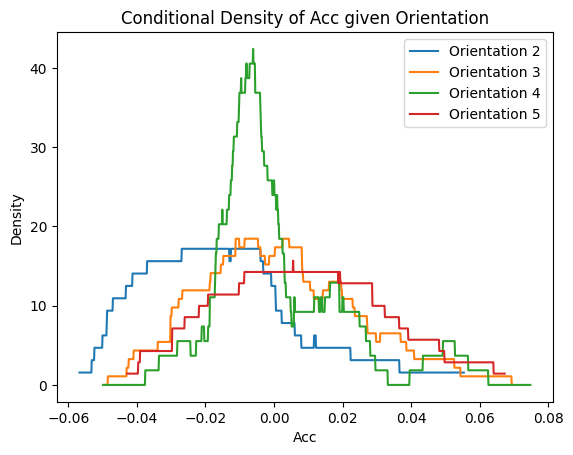

The most likely Orientation for Acc = -0.02 is 2
[array([2.84352135]), array([2.47954106]), array([1.71013129]), array([2.30034476])]
[2.84352135]
2
0


In [10]:
#(f)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

accdata = data.loc[:, 'acc']
accdata_ori_2 = data[(data['acc']!=0)&(data['orientation']==2)]
acc_ori_2 = accdata_ori_2.loc[:, 'acc']
acc_ori_2_1D = acc_ori_2.values[:, np.newaxis]
accdata_ori_3 = data[(data['acc']!=0)&(data['orientation']==3)]
acc_ori_3 = accdata_ori_3.loc[:, 'acc']
acc_ori_3_1D = acc_ori_3.values[:, np.newaxis]
accdata_ori_4 = data[(data['acc']!=0)&(data['orientation']==4)]
acc_ori_4 = accdata_ori_4.loc[:, 'acc']
acc_ori_4_1D = acc_ori_4.values[:, np.newaxis]
accdata_ori_5 = data[(data['acc']!=0)&(data['orientation']==5)]
acc_ori_5 = accdata_ori_5.loc[:, 'acc']
acc_ori_5_1D = acc_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

acc_ori_data = {}
acc_ori_data[2] = acc_ori_2_1D
acc_ori_data[3] = acc_ori_3_1D
acc_ori_data[4] = acc_ori_4_1D
acc_ori_data[5] = acc_ori_5_1D

fig, ax = plt.subplots()

best_bandwidths = {}
log_likelihoods = []
def kde_conditional(data, ori_num, target_acc, kernel='tophat'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='tophat')
    kde.fit(data)
    
    grid = GridSearchCV(kde, {'bandwidth': np.linspace(0.1*np.std(data), 2*np.std(data), 100)}, cv=5)  # 5-fold cross-validation, you can adjust this as needed
    grid.fit(data)
    kde = grid.best_estimator_

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_acc]]))
    log_likelihoods.append(log_likelihood)

    return kde

target_acc = -0.02
kde_acc_ori = {}
for i in ori_context:
    kde_acc_ori[i] = kde_conditional(acc_ori_data[i], i, target_acc, kernel='tophat')

ax.set_xlabel('Acc')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Acc given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 2
print(f"The most likely Orientation for Acc = {target_acc} is {most_likely_orientation}")

Text(0.5, 1.0, 'Distribution (Bandwidth=0.003)')

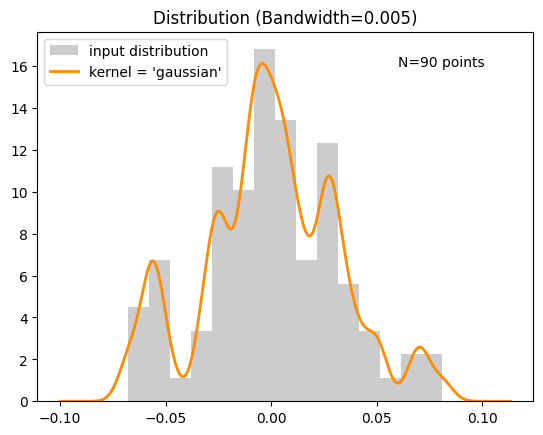

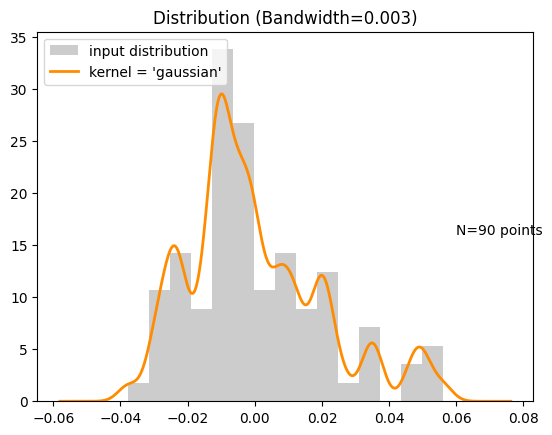

In [530]:
# (g)-a
N = 90
bandwidth_ga = 0.005
#best_bandwidth = find_best_bandwidth(amygdala)
Px = kde1D(amygdala, bandwidth_ga , kernel='gaussian')
plt.title(f'Distribution (Bandwidth={bandwidth_ga})')

bandwidth_gb = 0.003
# (g)-b
Py = kde1D(acc, bandwidth_gb,  kernel='gaussian')
plt.title(f'Distribution (Bandwidth={bandwidth_gb})')

Text(0.5, 1.0, 'Joint Distribution (Bandwidth=0.01)')

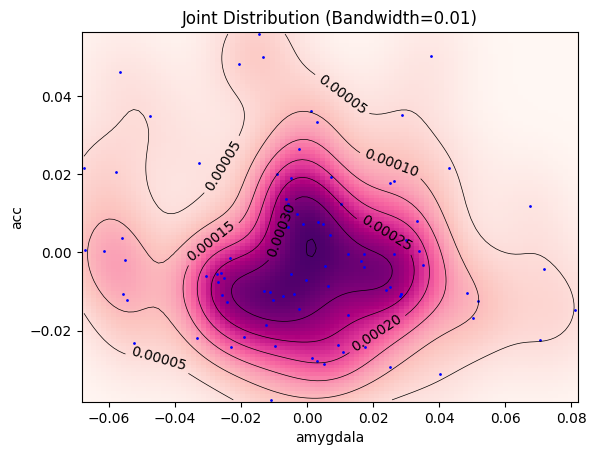

In [531]:
# (g)-c
bandwidth_gc = 0.01  # You can adjust this value

xx, yy, zz, zznorm = kde2D(amygdaladata, accdata, bandwidth_gc, kernel='gaussian', xbins=100j, ybins=100j)
plt.xlabel('amygdala')
plt.ylabel('acc')
plt.title(f'Joint Distribution (Bandwidth={bandwidth_gc})')

In [537]:
# (g)-(d)
from sklearn.metrics import mean_squared_error
N = 90
Px, z = kde1D(amygdala, bandwidth_a,kernel='gaussian', bins=100)
plt.close()
Py, z2 = kde1D(acc, bandwidth_b, kernel='gaussian',bins=100)
plt.close()

z = z.reshape(100,1)
z2 = z2.reshape(1,100)

z /= np.sum(z)
z2 /= np.sum(z2)

#P(x) * P(Y)
PxPy = np.matmul(z,z2)
#P(X,Y)
Pxy = zznorm
print(f'P(X)*P(Y) = {PxPy}')
print(f'P(X,Y) = {Pxy}')

# Independent or dependent
mse = mean_squared_error(PxPy, Pxy)
print(f'MSE = {mse}')

P(X)*P(Y) = [[2.69253026e-09 3.23721721e-09 3.86871586e-09 ... 2.24061477e-09
  1.93078010e-09 1.65271711e-09]
 [6.29250414e-09 7.56544989e-09 9.04127651e-09 ... 5.23636744e-09
  4.51227679e-09 3.86243728e-09]
 [1.39210914e-08 1.67372666e-08 2.00022812e-08 ... 1.15845692e-08
  9.98264225e-09 8.54498325e-09]
 ...
 [6.91288579e-09 8.31133199e-09 9.93266122e-09 ... 5.75262395e-09
  4.95714478e-09 4.24323722e-09]
 [3.15014819e-09 3.78740923e-09 4.52623633e-09 ... 2.62142591e-09
  2.25893225e-09 1.93361014e-09]
 [1.35794052e-09 1.63264588e-09 1.95113352e-09 ... 1.13002318e-09
  9.73762331e-10 8.33525093e-10]]
P(X,Y) = [[3.85363873e-06 4.52253574e-06 5.27485484e-06 ... 1.18908607e-05
  1.09013573e-05 9.91730265e-06]
 [4.75028876e-06 5.56857083e-06 6.48686871e-06 ... 1.39021054e-05
  1.27415619e-05 1.15878334e-05]
 [5.73204195e-06 6.71234401e-06 7.81016250e-06 ... 1.59116633e-05
  1.45769392e-05 1.32511861e-05]
 ...
 [8.31017062e-06 9.74624901e-06 1.13430071e-05 ... 8.68784162e-09
  7.6156196

Optimal Bandwidths:
Orientation 2: 0.018928258275161376
Orientation 3: 0.0206205422477024
Orientation 4: 0.015130919249295768
Orientation 5: 0.016376331572416986


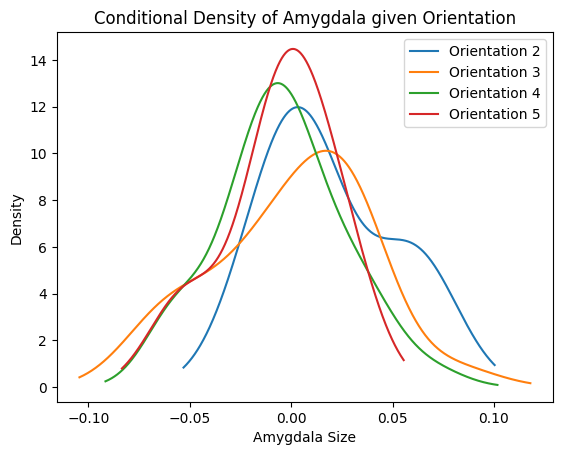

The most likely Orientation for Amygdala = 0.035 is 2
[array([1.95131459]), array([2.12487269]), array([1.68826363]), array([1.76608763])]
2


In [126]:
# (g)-(e)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

amygdaladata = data.loc[:, 'amygdala']
amygdala_ori_2 = data[(data['amygdala']!=0)&(data['orientation']==2)]
amy_ori_2 = amygdala_ori_2.loc[:, 'amygdala']
amy_ori_2_1D = amy_ori_2.values[:, np.newaxis]
amygdala_ori_3 = data[(data['amygdala']!=0)&(data['orientation']==3)]
amy_ori_3 = amygdala_ori_3.loc[:, 'amygdala']
amy_ori_3_1D = amy_ori_3.values[:, np.newaxis]
amygdala_ori_4 = data[(data['amygdala']!=0)&(data['orientation']==4)]
amy_ori_4 = amygdala_ori_4.loc[:, 'amygdala']
amy_ori_4_1D = amy_ori_4.values[:, np.newaxis]
amygdala_ori_5 = data[(data['amygdala']!=0)&(data['orientation']==5)]
amy_ori_5 = amygdala_ori_5.loc[:, 'amygdala']
amy_ori_5_1D = amy_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

amy_ori_data = {}
amy_ori_data[2] = amy_ori_2_1D
amy_ori_data[3] = amy_ori_3_1D
amy_ori_data[4] = amy_ori_4_1D
amy_ori_data[5] = amy_ori_5_1D

def silverman_bandwidth(data):
    n = len(data)
    std_dev = np.std(data)
    return 1.06 * std_dev * (n ** (-1 / 5))

optimal_bandwidth_ge = {}
for i in ori_context:
    optimal_bandwidth_ge[i] = silverman_bandwidth(amy_ori_data[i])

print("Optimal Bandwidths:")
for ori, bandwidth_value in optimal_bandwidth_ge.items():
    print(f"Orientation {ori}: {bandwidth_value}")

fig, ax = plt.subplots()

log_likelihoods = []
def kde_conditional(data, ori_num, bandwidth, target_amygdala, kernel='gaussian'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data)

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_amygdala]]))
    log_likelihoods.append(log_likelihood)

    return kde

target_amygdala = 0.035
kde_amy_ori = {}
for i in ori_context:
    kde_amy_ori[i] = kde_conditional(amy_ori_data[i], i, optimal_bandwidth_ge[i], target_amygdala, kernel='gaussian')

ax.set_xlabel('Amygdala Size')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Amygdala given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 1
print(f"The most likely Orientation for Amygdala = {target_amygdala} is {most_likely_orientation}")

print(log_likelihoods)
print(most_likely_orientation)

Optimal Bandwidths:
Orientation 2: 0.018928258275161376
Orientation 3: 0.0206205422477024
Orientation 4: 0.015130919249295768
Orientation 5: 0.016376331572416986


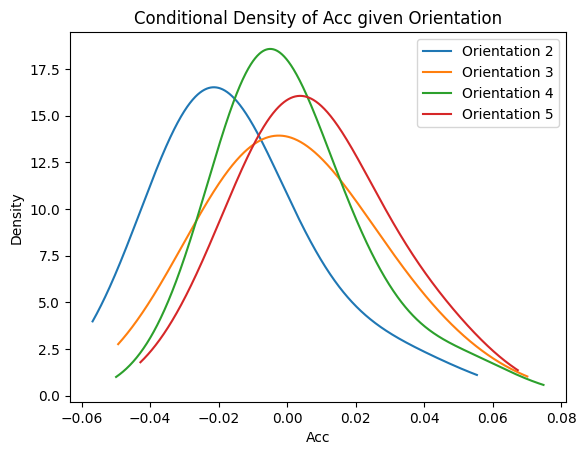

The most likely Orientation for Acc = -0.02 is 1
[array([2.80281276]), array([2.4285196]), array([2.59112533]), array([2.22314761])]
1


In [128]:
#(g)-(f)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./hw3_data.csv')

accdata = data.loc[:, 'acc']
accdata_ori_2 = data[(data['acc']!=0)&(data['orientation']==2)]
acc_ori_2 = accdata_ori_2.loc[:, 'acc']
acc_ori_2_1D = acc_ori_2.values[:, np.newaxis]
accdata_ori_3 = data[(data['acc']!=0)&(data['orientation']==3)]
acc_ori_3 = accdata_ori_3.loc[:, 'acc']
acc_ori_3_1D = acc_ori_3.values[:, np.newaxis]
accdata_ori_4 = data[(data['acc']!=0)&(data['orientation']==4)]
acc_ori_4 = accdata_ori_4.loc[:, 'acc']
acc_ori_4_1D = acc_ori_4.values[:, np.newaxis]
accdata_ori_5 = data[(data['acc']!=0)&(data['orientation']==5)]
acc_ori_5 = accdata_ori_5.loc[:, 'acc']
acc_ori_5_1D = acc_ori_5.values[:, np.newaxis]

ori_context = np.unique(orientationdata)

acc_ori_data = {}
acc_ori_data[2] = acc_ori_2_1D
acc_ori_data[3] = acc_ori_3_1D
acc_ori_data[4] = acc_ori_4_1D
acc_ori_data[5] = acc_ori_5_1D

def silverman_bandwidth(data):
    n = len(data)
    std_dev = np.std(data)
    return 1.06 * std_dev * (n ** (-1 / 5))

optimal_bandwidth_f = {}
for i in ori_context:
    optimal_bandwidth_f[i] = silverman_bandwidth(amy_ori_data[i])

print("Optimal Bandwidths:")
for ori, bandwidth_value in optimal_bandwidth_f.items():
    print(f"Orientation {ori}: {bandwidth_value}")

fig, ax = plt.subplots()
log_likelihoods = []
def kde_conditional(data, ori_num, bandwidth, target_acc, kernel='gaussian'):

    xx = np.linspace(np.min(data)-np.std(data),np.max(data)+np.std(data), 1000)[:, np.newaxis]
    
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data)

    log_dens = kde.score_samples(xx.reshape(-1, 1))
    density = np.exp(log_dens)

    label = f'Orientation {ori_num}'
    ax.plot(xx, density, label=label)

    log_likelihood = kde.score_samples(np.array([[target_acc]]))
    log_likelihoods.append(log_likelihood)

    return kde
    
target_acc = -0.02
kde_acc_ori = {}
for i in ori_context:
    kde_acc_ori[i] = kde_conditional(acc_ori_data[i], i, optimal_bandwidth_f[i], target_acc, kernel='gaussian')

ax.set_xlabel('Acc')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Acc given Orientation')
plt.show()

most_likely_orientation = np.argmax(log_likelihoods) + 1
print(f"The most likely Orientation for Acc = {target_acc} is {most_likely_orientation}")

print(log_likelihoods)
print(most_likely_orientation)

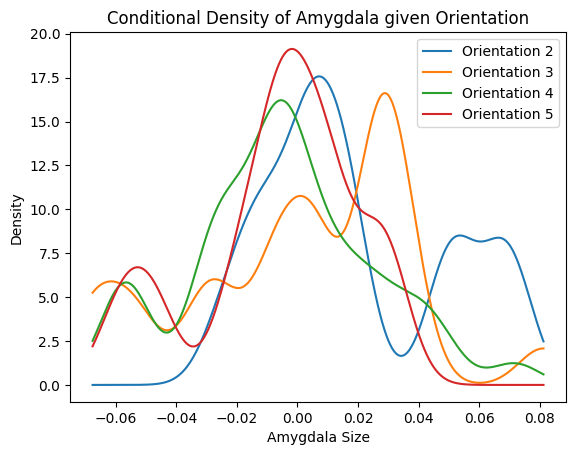

The most likely Orientation for Amygdala = 0.035 is 2
[array([-inf]), array([2.7488722]), array([1.80788885]), array([1.65025991])]
2


In [70]:
# Values for which you want to estimate conditional density
amygdala_values = np.linspace(min(amygdala), max(amygdala), 1000)

# Bandwidth selection (you can experiment with different values)
bandwidth = 0.008  # Adjust this value to find the optimal bandwidth

# Create a figure
fig, ax = plt.subplots()

for orient_value in range(1, 6):
    # Select data points with the specific Orientation value
    selected_amygdala = amygdala[orientation == orient_value]
    
    # Check if there are data points for the given orientation value
    if len(selected_amygdala) > 0:
        # Fit the KDE model with the selected Amygdala values
        kde = KernelDensity(bandwidth=bandwidth)
        kde.fit(selected_amygdala.reshape(-1, 1))

        # Score the samples
        log_dens = kde.score_samples(amygdala_values.reshape(-1, 1))
        density = np.exp(log_dens)

        # Plot the estimated conditional density
        label = f'Orientation {orient_value}'
        ax.plot(amygdala_values, density, label=label)

# Plot settings
ax.set_xlabel('Amygdala Size')
ax.set_ylabel('Density')
ax.legend()
plt.title('Conditional Density of Amygdala given Orientation')
plt.show()

# Now, let's find the most likely Orientation for a given Amygdala value (0.035)
target_amygdala = 0.035
log_likelihoods = []

for orient_value in range(1, 6):
    # Check if there are data points for the given orientation value
    if len(amygdala[orientation == orient_value]) > 0:
        # Fit the KDE model with the selected Orientation value
        kde = KernelDensity(kernel='tophat', bandwidth=bandwidth)
        kde.fit(amygdala[orientation == orient_value].reshape(-1, 1))

        # Score the target Amygdala value
        log_likelihood = kde.score_samples(np.array([[target_amygdala]]))
        log_likelihoods.append(log_likelihood)

most_likely_orientation = np.argmax(log_likelihoods) + 1
print(f"The most likely Orientation for Amygdala = {target_amygdala} is {most_likely_orientation}")

print(log_likelihoods)
print(most_likely_orientation)

In [26]:

kdes_amygdala = {}
for value in range(2, 5):
    kdes_amygdala[value] = conditional_density(data, 'orientation', 'amygdala', value)


plt.show()
print(kdes_amygdala)

{2: KernelDensity(bandwidth=0.008, kernel='tophat'), 3: KernelDensity(bandwidth=0.008, kernel='tophat'), 4: KernelDensity(bandwidth=0.008, kernel='tophat')}


In [28]:
ori_context = np.unique(orientationdata)
print(ori_context)


[2 3 4 5]
